In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input../input/googleplaystore'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
data = pd.read_csv("../input/google-play-store-apps/googleplaystore.csv")

In [3]:
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [4]:
data.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [5]:
# THERE ARE 34 CATEGORIES OF APPS
data['Category'].nunique() 

34

In [6]:
data['Category'].value_counts().head()

FAMILY      1972
GAME        1144
TOOLS        843
MEDICAL      463
BUSINESS     460
Name: Category, dtype: int64

In [7]:
df=data.groupby(by= ['Category',]).count()

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [9]:
df.head()

,App,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
Category,,,,,,,,,,,,
1.9,1,1,1,1,1,1,1,0,1,1,1,0
ART_AND_DESIGN,65,62,65,65,65,65,65,65,65,65,64,65
AUTO_AND_VEHICLES,85,73,85,85,85,85,85,85,85,85,85,85
BEAUTY,53,42,53,53,53,53,53,53,53,53,53,53
BOOKS_AND_REFERENCE,231,178,231,231,231,231,231,231,231,231,230,231


In [10]:
data['Installs'][0]

'10,000+'

In [11]:
data['Installs']=data['Installs'].apply(lambda i: i.replace(',',''))
data['Installs']= data['Installs'].apply(lambda j: j.replace('+',''))

data['Installs']= pd.to_numeric(data['Installs'], errors='coerce')

data['Reviews']= pd.to_numeric(data['Reviews'], errors='coerce')
data['Price']=data['Price'].apply(lambda k: k.replace('$',''))

data['Price']= pd.to_numeric(data['Price'], errors='coerce')


In [12]:
data.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              1
Size                 0
Installs             1
Type                 1
Price                1
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [13]:
o=data['Rating'].mean()
data['Rating'].fillna(o,inplace=True)

In [14]:
data.isnull().sum()

App               0
Category          0
Rating            0
Reviews           1
Size              0
Installs          1
Type              1
Price             1
Content Rating    1
Genres            0
Last Updated      0
Current Ver       8
Android Ver       3
dtype: int64

In [15]:
# this is an exception
data[data['Rating']>5]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,NaN,"1,000+",NaN,0,NaN,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [16]:
data.Rating.max()

19.0

<AxesSubplot:xlabel='Rating'>

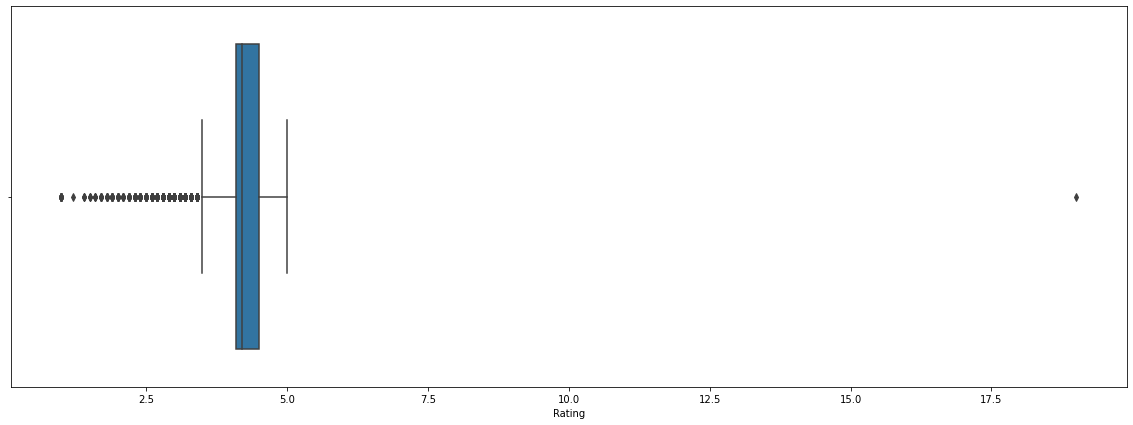

In [17]:
# THERE IS ONLY ONE  OUTLIER  at right side IN RATING
plt.figure(figsize=(20,7))
sns.boxplot(x='Rating', data = data)

In [18]:
data.drop([10472], inplace=True)

In [19]:
data.Rating.max()

5.0

# **CORRELATIONS BETWEEN VARAIABLES**

<AxesSubplot:>

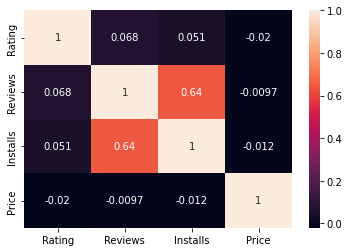

In [20]:
sns.heatmap(data.corr(), annot=True)

# **Most installed apps********

In [21]:
m=data.Installs.sort_values(ascending=False).head(20)

In [22]:
data.Installs.sum()

167633433487.0

In [23]:
x=data.groupby('App').Installs.sum().sort_values(ascending=False).head(20)

In [24]:
data.App.nunique()

9659

# **TOP MOST INSTALLED APPS**

<AxesSubplot:ylabel='App'>

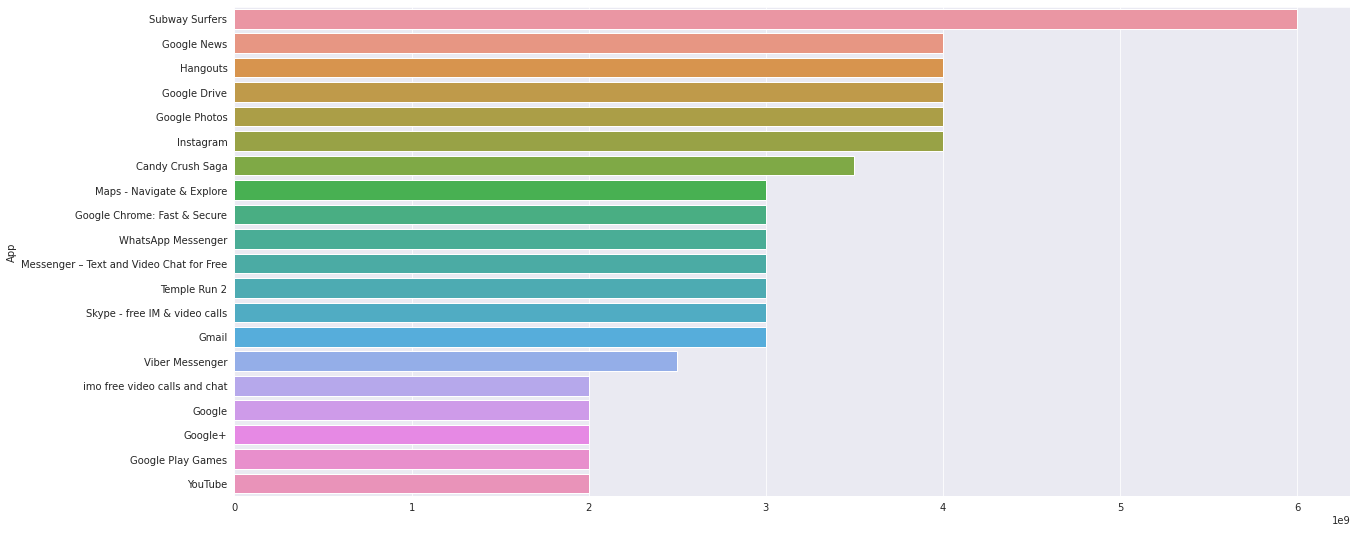

In [25]:
plt.figure(figsize=(20,9))

sns.set_style('darkgrid')
sns.barplot(x=x.values,y=x.index)

In [26]:
data['Reviews'].sort_values(ascending=False)

2544    78158306.0
3943    78128208.0
381     69119316.0
336     69119316.0
3904    69109672.0
           ...    
9713           0.0
8495           0.0
6277           0.0
8489           0.0
5086           0.0
Name: Reviews, Length: 10840, dtype: float64

# **TOP RAITED APP **

<AxesSubplot:ylabel='App'>

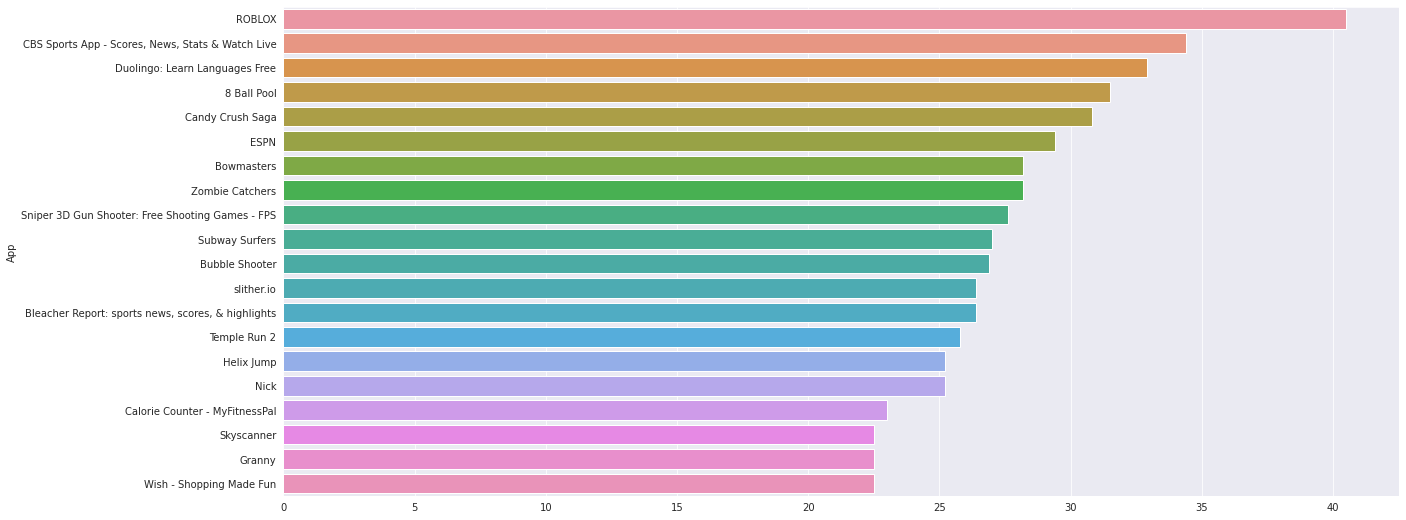

In [27]:
plt.figure(figsize=(20,9))

sns.set_style("darkgrid")
y=data.groupby('App').Rating.sum().sort_values(ascending=False).head(20)

sns.barplot(x=y.values,y=y.index)

# **TOP REVIEWS APPS**

<AxesSubplot:ylabel='App'>

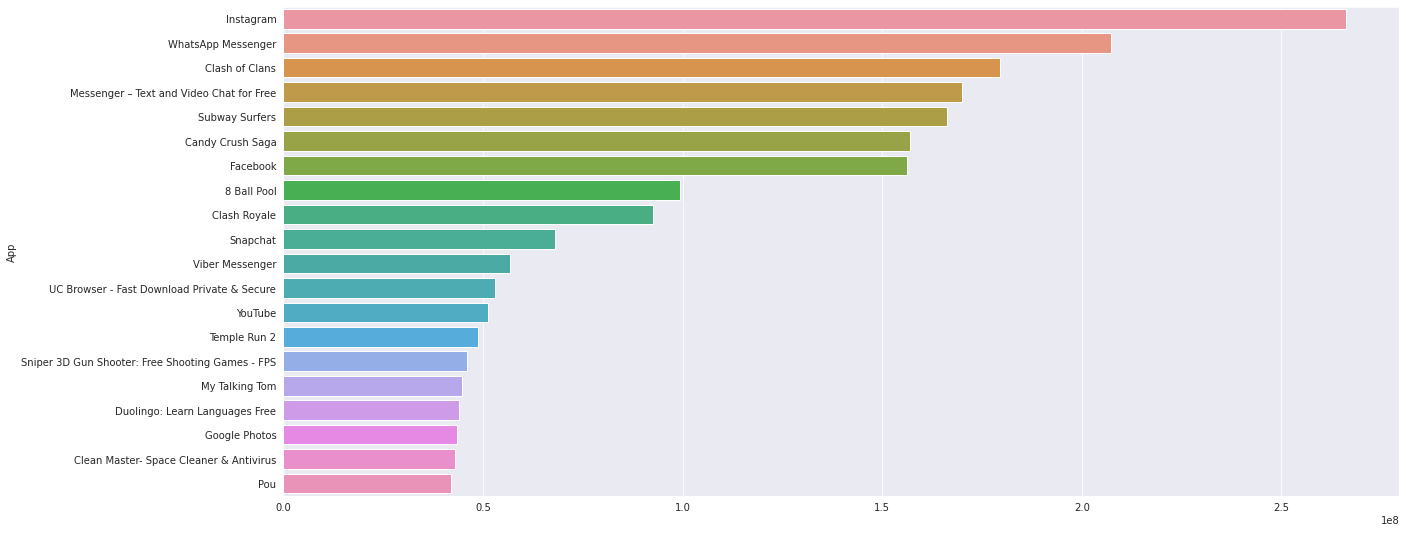

In [28]:
plt.figure(figsize=(20,9))

sns.set_style("darkgrid")
j=data.groupby('App').Reviews.sum().sort_values(ascending=False).head(20)

sns.barplot(x=j.values,y=j.index)

# **MOST INSTALLED APP (CATEGORY WISE)** 

<AxesSubplot:ylabel='Category'>

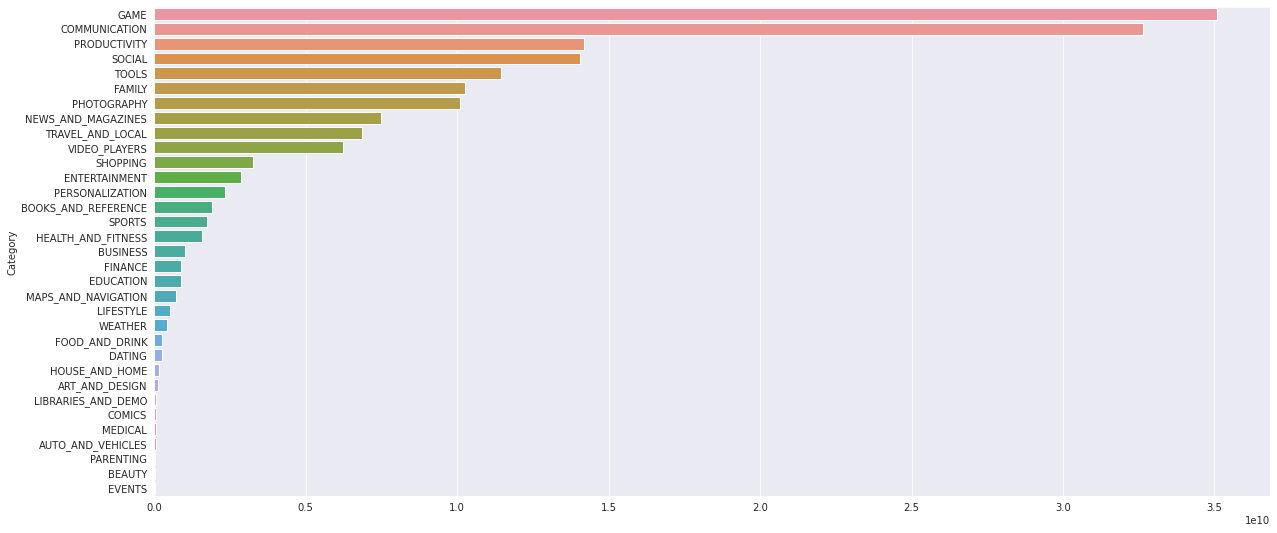

In [29]:
plt.figure(figsize=(20,9))

C=data.groupby('Category').Installs.sum().sort_values(ascending= False)

sns.barplot(x=C.values, y=C.index)

# **TOP RATED (CATEGORY WISE)**

<AxesSubplot:ylabel='Category'>

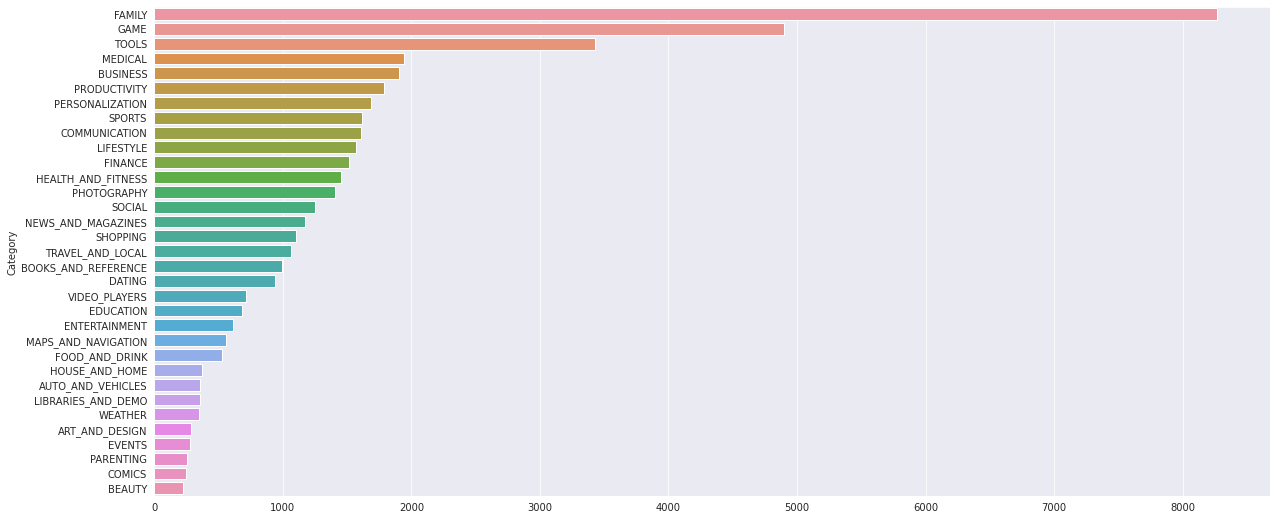

In [30]:
plt.figure(figsize=(20,9))

C=data.groupby('Category').Rating.sum().sort_values(ascending= False)

sns.barplot(x=C.values, y=C.index)

# **TOP Reviwed apps (CATEGORY WISE)**

<AxesSubplot:ylabel='Category'>

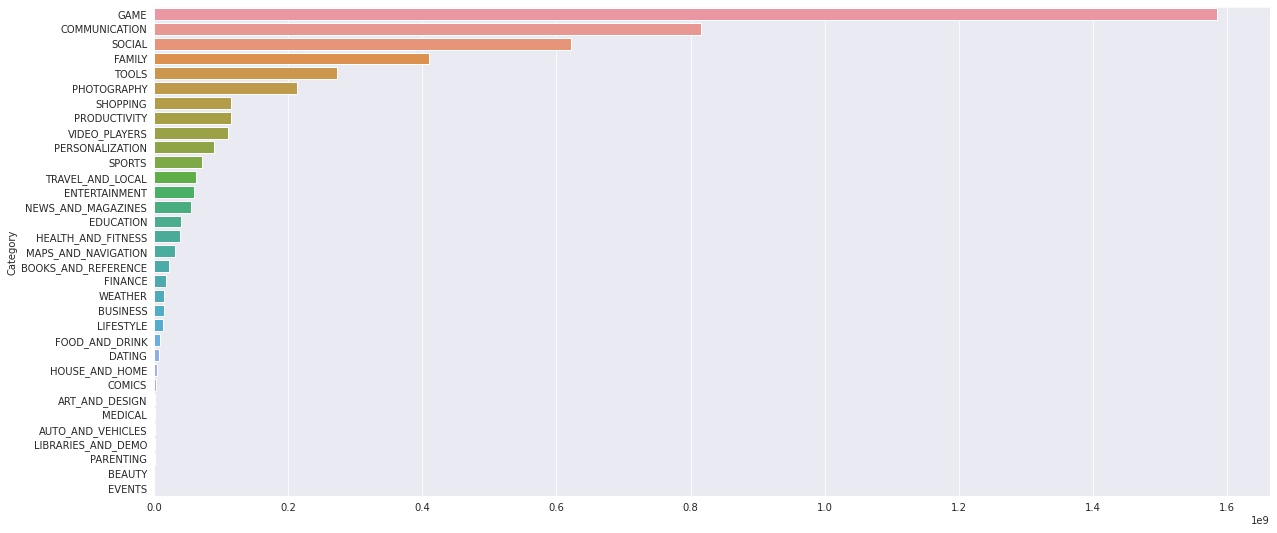

In [31]:
plt.figure(figsize=(20,9))

C=data.groupby('Category').Reviews.sum().sort_values(ascending= False)

sns.barplot(x=C.values, y=C.index)

# **TOP PAID APPS**

<AxesSubplot:ylabel='App'>

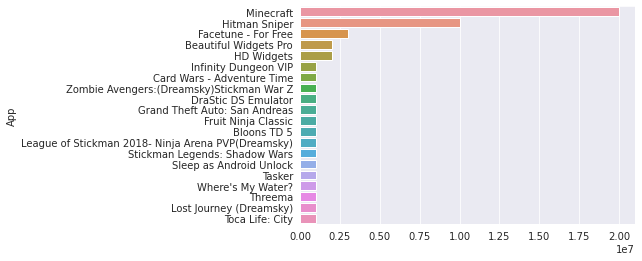

In [32]:
free = data[data.Type=='Paid']
f= free.groupby('App').Installs.sum().sort_values(ascending =False).head(20)

sns.barplot(x=f.values,y=f.index)

# **TOP FREE APPS**

<AxesSubplot:ylabel='App'>

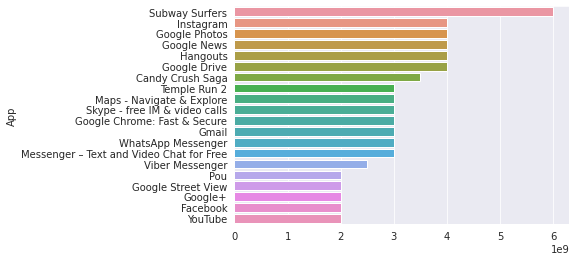

In [33]:
free = data[data.Type=='Free']
f= free.groupby('App').Installs.sum().sort_values(ascending =False).head(20)

sns.barplot(x=f.values,y=f.index)

# **RATIOS OF PAID AND FREE**

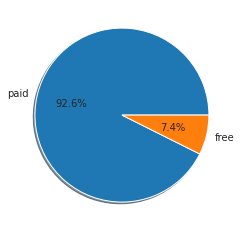

In [34]:
x= data.Type.value_counts()
label=['paid', 'free']
plt.pie(x,labels=label, autopct='%1.1f%%', shadow=True,)
plt.show()

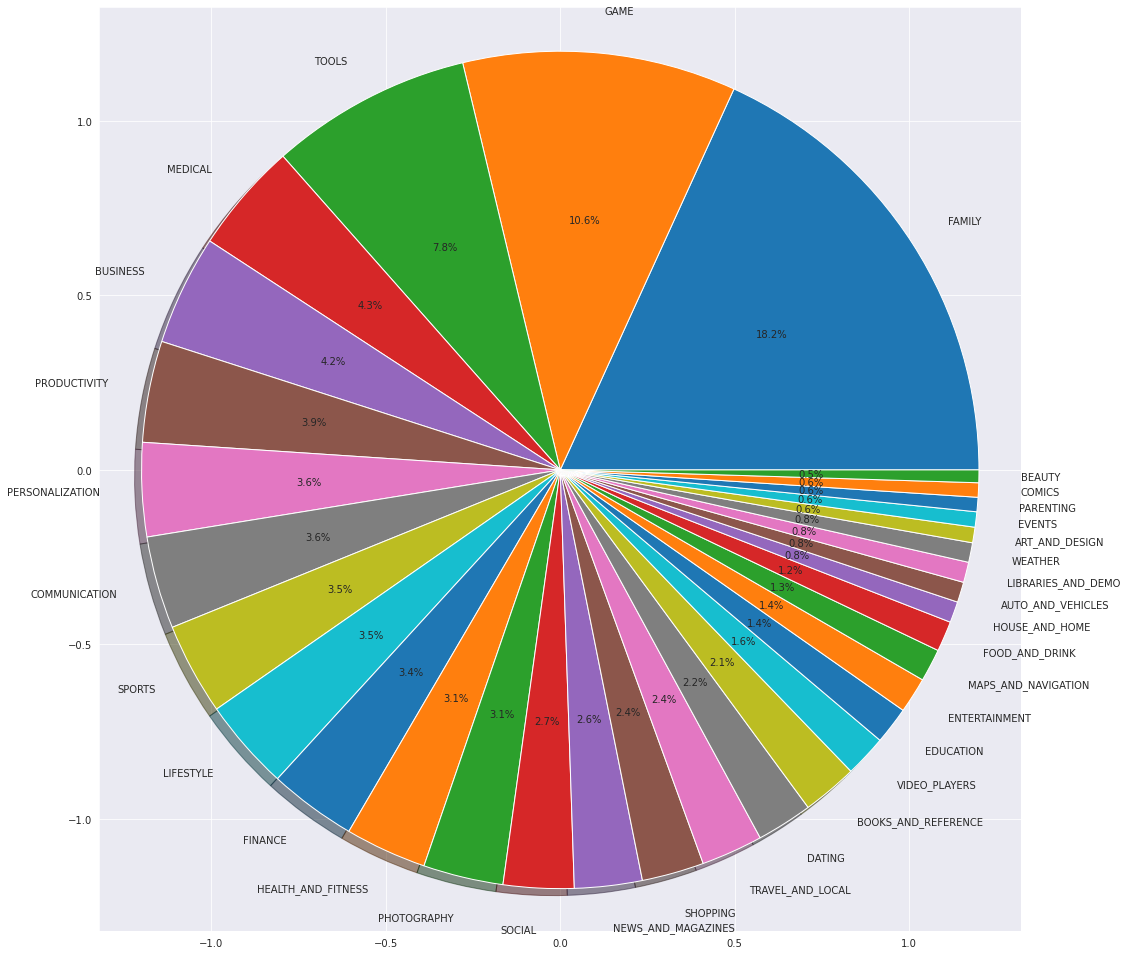

In [35]:
plt.figure(figsize=(20,17))

c=data.Category.value_counts()
label= list(c.index)
plt.pie(c,labels=label,autopct='%1.1f%%',shadow=True,radius=1.2,frame=True)
plt.show()
